In [1]:
import re
import sys
import csv
import time

# pd.set_option?
import pandas as pd
# ÊòæÁ§∫ÊâÄÊúâÂàó ‰ºöÂç°È°ø
# pd.set_option('display.max_columns', None)
# ÊòæÁ§∫ÊâÄÊúâË°å ‰ºöÂç°È°ø
# pd.set_option('display.max_rows', None)
# ËÆæÁΩÆ value ÁöÑÊòæÁ§∫ÈïøÂ∫¶ ÈªòËÆ§‰∏∫ 50  ‰ºöÈùûÂ∏∏Âç°È°ø
# pd.set_option('max_colwidth',50)

import jieba
import numpy as np
from icecream import ic
from datetime import datetime
from collections import Counter

%matplotlib inline
import matplotlib.pyplot as plt

# ËØç‰∫ë
import stylecloud
from stylecloud import gen_stylecloud

# Áõ∏ÂÖ≥ÊÄß
import seaborn as sns

# solve err
sns.set_style("darkgrid",{"font.sans-serif":['KaiTi', 'Arial']})

## ËØÑËÆ∫Âå∫Êï∞ÊçÆÊï¥ÁêÜ

In [22]:
comment_fname = r"D:\zhuomian\WeiBoTopic\Environment/data.csv"
comment = pd.read_csv(comment_fname,sep=',',engine='python').set_index('id')
comment

bid     user_id          Áî®Êà∑ÊòµÁß∞  \
id                                                  
4.840000e+15  MfO5U69ra  6934544753      TURBO_Ëø™Âäõ   
4.840000e+15  MfO5PmlYP  2619726591         ÂìéÂìüÂñÇÂî∑i   
4.840000e+15  MfO6weixu  2844948403          È£éÂΩ±ÊúàÊÇü   
4.840000e+15  MfO7sD1Lx  6081458415       Âç°Â∏ÉÂìíÂìíÂìíÂìíÂìí   
4.840000e+15  MfO7qlKwi  3835409455  bilpalalalal   
...                 ...         ...           ...   
4.840000e+15  MgyTStFnB  3882759549       ÂèØ‰πêÊ©òÂ≠êÊ∞îÊ≥°Ê∞¥   
4.840000e+15  MgyTQabIZ  6267821803      ÂÅèÁà±‰∏âËä±ÁöÑ17Âñµ   
4.840000e+15  MgyUH1D5C  3839059935         ÂîêÂîêÂîêÂ∞èÂã§   
4.840000e+15  MgyUFwKpB  1712344213     Jeny1o_o1   
4.840000e+15  MgyUCykOy  1925882322          LÊùéÈü´Y   

                                                           ÂæÆÂçöÊ≠£Êñá Â§¥Êù°ÊñáÁ´†url ÂèëÂ∏É‰ΩçÁΩÆ  \
id                                                                             
4.840000e+15  ‰∏ñÁïåÊùØÁõòÁÇπÈÇ£‰∫õÂ•ΩÂê¨ÁöÑ‰∏ñÁïåÊùØ‰∏ªÈ¢òÊõ≤ü§ó~2022Âπ¥Âç°Â°îÂ∞î‰∏ñÁïåÊùØ„ÄäHayyaHayya„Äãüî•üî•üî•#Âç°...     NaN  NaN   
4.840000e+15  ÊΩòÂ∏ïÊñØÈõÑÈπ∞ÂøÖÂ∞ÜÁø±ÁøîÂú®Âç°Â°îÂ∞î‰∏äÁ©∫üá¶üá∑‚öΩÔ∏èÂ∞±ÊÉ≥Ê¢ÖË•øÂ§∫ÂÜ†ÔºåÂ∞±ÊÉ≥‰ªñÂ∞ÅÁ•ûÔºåÂ∞±ÊÉ≥‰ªñÊçßËµ∑Â§ßÂäõÁ•ûÊùØÂ¶ÇÊÑøÂêßÔºåÂ¶Ç...     NaN  NaN   
4.840000e+15                               #Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#ÂõõÂπ¥Âêé‰∏úÂ±±ÂÜçËµ∑Âä†Ê≤πÈòøÊ†πÂª∑     NaN  NaN   
4.840000e+15  ‰∏ñÁïåÊùØËøô‰∏™‰∏ªÈ¢òÊõ≤ÁúüÁöÑ‰∏ÄË®ÄÈöæÂ∞ΩÁ¨¨‰∏ÄÈÅçÔºö‰ªÄ‰πàÁé©ÊÑèËøôÊòØÁ¨¨‰∫åÈÅçÔºöÂ•ΩÂÉèËøòË°åÁ¨¨‰∏âÈÅçÔºöÊØíËèáÊØíËèáÊØíÂìíÂìí#Âç°Â°î...     NaN  NaN   
4.840000e+15                                ‰ªäÂπ¥ÊàëËßâÂæóÂ∑¥Ë•øÂèØËÉΩ‰ºöËµ¢#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#     NaN  NaN   
...                                                         ...     ...  ...   
4.840000e+15          ÊàëËÆ∞Âæó‰Ω†ÂØπÊàëËØ¥Ëøá‰∏çÊ≠¢Ê¢ÖË•øÂ∏ÖÔºåÂÜÖÈ©¨Â∞î‰πüË∂ÖÂ∏Ö#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#LÂèØ‰πêÊ©òÂ≠êÊ∞îÊ≥°Ê∞¥ÁöÑÂæÆÂçöËßÜÈ¢ë     NaN  NaN   
4.840000e+15  #Âç°Â°îÂ∞î‰∏ñÁïåÊùØ##‰πåÊãâÂú≠0ÊØî0Èü©ÂõΩ#ÂèåÊñπÂäøÂùáÂäõÊïåÔºåüá∞üá∑ÁîöËá≥ËÉΩÊää82Ë∏¢Á∫¢Ê∏©‰∫ÜÂ∞±ÊòØËøô‰ø©ÈòüÁöÑÂèçÂáªÁúã...     NaN  NaN   
4.840000e+15                 ‰ªäÂ§©ÂáåÊô®Èõ∂ÁÇπÁúãCÁΩóÔºå3ÁÇπÁúãÂÜÖÈ©¨Â∞î‚öΩ#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ##CÁΩó##ÂÜÖÈ©¨Â∞î#     NaN   ÂÆúÂÆæ   
4.840000e+15  ÊòéÂáåÊô®0ÁÇπÂç°Â°îÂ∞î‰∏ñÁïåÊùØÂ∞èÁªÑËµõHÁªÑÁ¨¨1ËΩÆËë°ËêÑÁâôüáµüáπVSüá¨üá≠Âä†Á∫≥‰ªéÂÄíÊï∞ÁôæÂ§©Âà∞‰ªäÂ§©ÁöÑËøô‰∏ÄÂàªÂç≥Â∞ÜÊù•‰∏¥...     NaN  NaN   
4.840000e+15  11.24ÂèàËèúÂèàÁà±ÁúãÂèàÁà±Áé©Â∞±ÊòØÊàë#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#Âí±Â∞±‰º∞Êë∏ÁùÄÔΩû‰∏§Âì•‰πüÂú®ÁúãÊú±‰∏ÄÈæô#Êú±‰∏ÄÈæô#ËÉ°Ê≠å#ËÉ°Ê≠å#     NaN  NaN   

             ËâæÁâπÁî®Êà∑                          ËØùÈ¢ò  ËΩ¨ÂèëÊï∞  ËØÑËÆ∫Êï∞  ÁÇπËµûÊï∞  \
id                                                             
4.840000e+15  NaN           Âç°Â°îÂ∞î‰∏ñÁïåÊùØ,‰∏ñÁïåÊùØ‰∏ªÈ¢òÊõ≤,‰∏ñÁïåÊùØ    1    0    5   
4.840000e+15  NaN                      Âç°Â°îÂ∞î‰∏ñÁïåÊùØ    0    3    1   
4.840000e+15  NaN                      Âç°Â°îÂ∞î‰∏ñÁïåÊùØ    0    2    1   
4.840000e+15  NaN               Âç°Â°îÂ∞î‰∏ñÁïåÊùØ,‰∏ñÁïåÊùØ‰∏ªÈ¢òÊõ≤    0    1    0   
4.840000e+15  NaN                      Âç°Â°îÂ∞î‰∏ñÁïåÊùØ    0    1    1   
...           ...                         ...  ...  ...  ...   
4.840000e+15  NaN                      Âç°Â°îÂ∞î‰∏ñÁïåÊùØ    0    0    0   
4.840000e+15  NaN             Âç°Â°îÂ∞î‰∏ñÁïåÊùØ,‰πåÊãâÂú≠0ÊØî0Èü©ÂõΩ    0    0    0   
4.840000e+15  NaN               Âç°Â°îÂ∞î‰∏ñÁïåÊùØ,CÁΩó,ÂÜÖÈ©¨Â∞î    0    0    0   
4.840000e+15  NaN  ËøëÂáªÂç°Â°îÂ∞î,Âõ¥ËßÇ‰∏ñÁïåÊùØ,Âç°Â°îÂ∞î‰∏ñÁïåÊùØ,cÁΩó‰∏ñÁïåÊùØÈ¶ñÁßÄ    0    0    0   
4.840000e+15  NaN               Âç°Â°îÂ∞î‰∏ñÁïåÊùØ,Êú±‰∏ÄÈæô,ËÉ°Ê≠å    0    0    0   

                          ÂèëÂ∏ÉÊó∂Èó¥           ÂèëÂ∏ÉÂ∑•ÂÖ∑  \
id                                              
4.840000e+15  2022/11/20 00:23          ‰∏ñÁïåÊùØË∂ÖËØù   
4.840000e+15  2022/11/20 00:23      iPhoneÂÆ¢Êà∑Á´Ø   
4.840000e+15  2022/11/20 00:25    HarmonyOSËÆæÂ§á   
4.840000e+15  2022/11/20 00:27  iPhone 14 Pro   
4.840000e+15  2022/11/20 00:27        Android   
...                        ...           

In [3]:
len(comment)

12748

In [4]:
# ÂéªÊéâÂπ¥‰ªΩÔºå‰ª•Á°Æ‰øùÂêéÈù¢ÂèØËßÜÂåñÁöÑÁÆÄÊ¥Å
date_list1_clean = []
for each in comment['ÂèëÂ∏ÉÊó∂Èó¥']:
    cancel = each.replace('2022/','')
    date_list1_clean.append(cancel)
    
len(date_list1_clean)

12748

In [21]:
dates = []
# ÊäΩÂá∫Êó•ÊúüËøõË°åËΩ¨Âåñ
for day in date_list1_clean:
    current_date = datetime.strptime(day, '%m/%d %H:%M')
    dates.append(current_date)
dates

[datetime.datetime(1900, 11, 20, 0, 23),
 datetime.datetime(1900, 11, 20, 0, 23),
 datetime.datetime(1900, 11, 20, 0, 25),
 datetime.datetime(1900, 11, 20, 0, 27),
 datetime.datetime(1900, 11, 20, 0, 27),
 datetime.datetime(1900, 11, 20, 0, 28),
 datetime.datetime(1900, 11, 20, 0, 28),
 datetime.datetime(1900, 11, 20, 0, 30),
 datetime.datetime(1900, 11, 20, 0, 30),
 datetime.datetime(1900, 11, 20, 0, 31),
 datetime.datetime(1900, 11, 20, 0, 31),
 datetime.datetime(1900, 11, 20, 0, 31),
 datetime.datetime(1900, 11, 20, 0, 32),
 datetime.datetime(1900, 11, 20, 0, 32),
 datetime.datetime(1900, 11, 20, 0, 32),
 datetime.datetime(1900, 11, 20, 0, 32),
 datetime.datetime(1900, 11, 20, 0, 33),
 datetime.datetime(1900, 11, 20, 0, 34),
 datetime.datetime(1900, 11, 20, 0, 34),
 datetime.datetime(1900, 11, 20, 0, 34),
 datetime.datetime(1900, 11, 20, 0, 34),
 datetime.datetime(1900, 11, 20, 0, 35),
 datetime.datetime(1900, 11, 20, 0, 35),
 datetime.datetime(1900, 11, 20, 0, 36),
 datetime.dateti

In [20]:
dates1 = []

for each in dates:
    dates1.append(each.strftime('%m/%d'))
    
dates1

['11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',


## ÊåâÂ§©ÁªüËÆ°ÂèëË¥¥‰∏™Êï∞

In [7]:
date_dict1 = {}

for date in dates1:
    date_dict1[date] = date_dict1.get(date, 0) + 1
date_dict1

{'11/20': 2240, '11/21': 3098, '11/22': 3234, '11/23': 2415, '11/24': 1761}

In [8]:
date_count = pd.DataFrame()
date_count["date"] = pd.to_datetime(comment['ÂèëÂ∏ÉÊó∂Èó¥'])
date_count = date_count.set_index(date_count["date"])
date_count["count"] = 1

date_count.resample('D').sum().head()

count
date             
2022-11-20   2240
2022-11-21   3098
2022-11-22   3234
2022-11-23   2415
2022-11-24   1761

In [9]:
for key, value in date_dict1.items():
    print('ÊØèÊó•ÂèëÂ∏ñÈáè '+ '2022/' + key + 'Ôºö ' + str(value))

ÊØèÊó•ÂèëÂ∏ñÈáè 2022/11/20Ôºö 2240
ÊØèÊó•ÂèëÂ∏ñÈáè 2022/11/21Ôºö 3098
ÊØèÊó•ÂèëÂ∏ñÈáè 2022/11/22Ôºö 3234
ÊØèÊó•ÂèëÂ∏ñÈáè 2022/11/23Ôºö 2415
ÊØèÊó•ÂèëÂ∏ñÈáè 2022/11/24Ôºö 1761


## ÊåâÂ∞èÊó∂ÁªüËÆ°

In [10]:
date_count.resample('H').sum()

count
date                      
2022-11-20 00:00:00     87
2022-11-20 01:00:00     50
2022-11-20 02:00:00     38
2022-11-20 03:00:00     27
2022-11-20 04:00:00      9
...                    ...
2022-11-24 19:00:00     98
2022-11-24 20:00:00     97
2022-11-24 21:00:00     98
2022-11-24 22:00:00     93
2022-11-24 23:00:00    102

[120 rows x 1 columns]

In [13]:
# Êó•ÊúüÂ∫èÂàóÂåñ
dates1_df = pd.DataFrame({'Êó•Êúü': [key for key in date_dict1.keys()],
                        'Count': [value for value in date_dict1.values()]})
dates1_df

Êó•Êúü  Count
0  11/20   2240
1  11/21   3098
2  11/22   3234
3  11/23   2415
4  11/24   1761

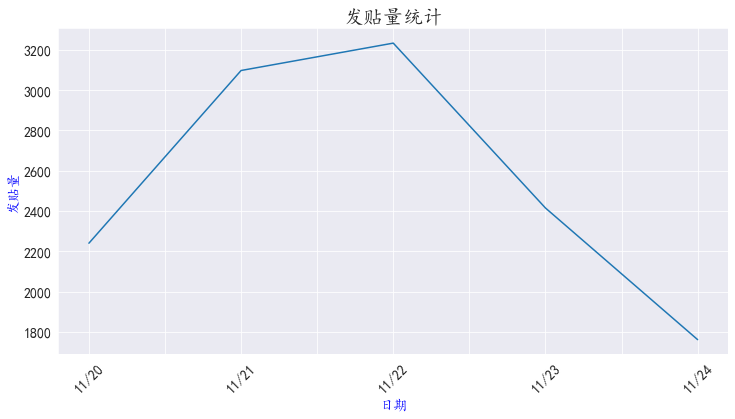

In [14]:
#ËÆæÁΩÆÊ†áÈ¢òÔºåÂùêÊ†áËΩ¥Ê†áÁ≠æÂèÇÊï∞
dates1_df[::].plot(kind = 'line',
              fontsize = 12,
              x = 'Êó•Êúü',
              y = 'Count',
              figsize = (12,6),
              legend = None)
plt.title('ÂèëË¥¥ÈáèÁªüËÆ°', fontsize = 20)
plt.xlabel('Êó•Êúü', fontsize = 14, color = 'blue')
plt.xticks(rotation=45)
plt.ylabel('ÂèëË¥¥Èáè', fontsize = 14, color = 'blue')

# ËÆæÁΩÆÂàªÂ∫¶Á∫ø
plt.tick_params(axis='both', labelsize=14)

# ËÆæÁΩÆÁΩëÊ†º
plt.grid(True)
plt.show()

## ËØùÈ¢òÊ†áÁ≠æÈ¢ëÁéá

In [19]:
ht1_list = []
for line in comment['ÂæÆÂçöÊ≠£Êñá']:
    line_s = line.split('\n')

    for i in range(0, len(line_s)):
        if i == 0:
            lst = re.findall(r'(#.+?#)', line_s[i])
    
            if lst is not None:
                for each in lst:
                    ht1_list.append(each)
        
        if i == 2:
            lst = re.findall(r'(#.+?#)', line_s[i])
            
            if lst is not None:
                for each in lst:
                    ht1_list.append(each)
                    
ht1_list

['#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#',
 '#‰∏ñÁïåÊùØ‰∏ªÈ¢òÊõ≤#',
 '#‰∏ñÁïåÊùØ#',
 '#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#',
 '#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#',
 '#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#',
 '#‰∏ñÁïåÊùØ‰∏ªÈ¢òÊõ≤#',
 '#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#',
 '#‰∏ñÁïåÊùØÊúÄÂº∫Èü≥#',
 '#‰∏≠ÂõΩÁßªÂä®ËßÜÈ¢ëÂΩ©ÈìÉ#',
 '#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#',
 '#2022‰∏ñÁïåÊùØ#',
 '#CÁΩó#',
 '#ÂÜÖÈ©¨Â∞î#',
 '#ÂìàÂºóËå®#',
 '#Ê†ºÈõ∑Ëå®Âç°#',
 '#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#',
 '#‰∏ñÁïåÊùØ#',
 '#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#',
 '#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#',
 '#ÈáçÂ∫ÜÂ∏ÇÊ∞ëÂèØÂÖçË¥πËßÇÁúã‰∏ñÁïåÊùØ#',
 '#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#',
 '#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#',
 '#Ê¢ÖË•ø#',
 '#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#',
 '#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#',
 '#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#',
 '#Èü≥‰πêÁé∞Âú∫#',
 '#Èü≥‰πêÊàøÂ≠ê#',
 '#‰∏ñÁïåÊùØ‰∏ªÈ¢òÊõ≤#',
 '#‰∏ñÁïåÊùØ#',
 '#FIFA‰∏ñÁïåÊùØ#',
 '#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#',
 '#‰∏ñÁïåÊùØ32Âº∫Â∑°Á§º#',
 '#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#',
 '#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#',
 '#‰∏çÊ≠¢ÊóÖË°å#',
 '#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#',
 '#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#',
 '#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#',
 '#‰∏ñÁïåÊùØÁêÉËø∑‰∏ªÈ¢òÊõ≤ÂèëÂ∏É#',
 '#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#',
 '#Âç°Â°îÂ∞î‰∏ñÁï

In [16]:
average =len(ht1_list) / len(comment)
print('Âπ≥ÂùáÊØè‰∏™Â∏ñÂ≠êÂåÖÂê´ÁöÑËØùÈ¢òÊ†áÁ≠æ: ' + str(average))

Âπ≥ÂùáÊØè‰∏™Â∏ñÂ≠êÂåÖÂê´ÁöÑËØùÈ¢òÊ†áÁ≠æ: 2.100564794477565


In [18]:
ht1_fre = {}

for tag in ht1_list:
    ht1_fre[tag] = ht1_fre.get(tag, 0) + 1
ht1_fre

{'#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#': 12695,
 '#‰∏ñÁïåÊùØ‰∏ªÈ¢òÊõ≤#': 11,
 '#‰∏ñÁïåÊùØ#': 2412,
 '#‰∏ñÁïåÊùØÊúÄÂº∫Èü≥#': 1,
 '#‰∏≠ÂõΩÁßªÂä®ËßÜÈ¢ëÂΩ©ÈìÉ#': 2,
 '#2022‰∏ñÁïåÊùØ#': 53,
 '#CÁΩó#': 64,
 '#ÂÜÖÈ©¨Â∞î#': 92,
 '#ÂìàÂºóËå®#': 6,
 '#Ê†ºÈõ∑Ëå®Âç°#': 4,
 '#ÈáçÂ∫ÜÂ∏ÇÊ∞ëÂèØÂÖçË¥πËßÇÁúã‰∏ñÁïåÊùØ#': 6,
 '#Ê¢ÖË•ø#': 325,
 '#Èü≥‰πêÁé∞Âú∫#': 1,
 '#Èü≥‰πêÊàøÂ≠ê#': 1,
 '#FIFA‰∏ñÁïåÊùØ#': 189,
 '#‰∏ñÁïåÊùØ32Âº∫Â∑°Á§º#': 1,
 '#‰∏çÊ≠¢ÊóÖË°å#': 5,
 '#‰∏ñÁïåÊùØÁêÉËø∑‰∏ªÈ¢òÊõ≤ÂèëÂ∏É#': 1,
 '#‰∏ñÁïåÊùØÂºÄÂπïÂºè#': 339,
 '#‰∏ñÁïåÊùØÂÄíËÆ°Êó∂1Â§©#': 4,
 '#ÈòøÊ†πÂª∑ÈòüÂä†Ê≤π#': 47,
 '#Âç°Â°îÂ∞î‰∏ñÁïåÊùØÂºÄÂπï#': 9,
 '#‰∏ñÁïåÊùØÈ¢ÑË®ÄÂÆ∂Â∑≤‰∏äÁ∫ø#': 35,
 '#ÂêêÊßΩ‰∏™ÁêÉ#': 30,
 '#‰∏ñÁïåÊùØ‰∏ìÊ†èÊòüÊé®ÂÆò#': 15,
 '#ÁåéÂ•á#': 1,
 '#ÊêûÁ¨ë#': 9,
 '#Ë∂≥ÁêÉ#': 393,
 '#2022Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#': 111,
 '#ÂêçÂ≠óÂèòÂèòÂèò#': 3,
 '#Âç°Â°îÂ∞î‰∏ñÁïåÊùØÁ∫ØÁêÉËø∑#': 3,
 '#‰Ω†Â•ΩÂç°Â°îÂ∞î#': 15,
 '#Âç°Â°îÂ∞îÊ∞ë‰ºóÁÇπËµû‰∏≠ÂõΩÂ§ßÂ∑¥#': 8,
 '#‰∏ñÁïåÊùØÂºÄÂπï#': 12,
 '#Â∑¥Ë•øÈòüÂä†Ê≤π#': 19,
 '#ÂÜÖÈ©¨Â∞îÂä†Ê≤π#': 4,
 '#‰∏ñÁïåÊùØÂÜ†ÂÜ

In [13]:
ht1_df = pd.DataFrame({'Hashtag': [user for user in ht1_fre.keys()],
                      'Count': [count for count in ht1_fre.values()]})

ht1_df = ht1_df.sort_values('Count', ascending=False).reset_index(drop=True)
ht1_df

Hashtag  Count
0          #Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#  12695
1             #‰∏ñÁïåÊùØ#   2412
2              #Ë∂≥ÁêÉ#    393
3      #ÈòøÊ†πÂª∑vsÊ≤ôÁâπÈòøÊãâ‰ºØ#    385
4          #Âæ∑ÂõΩvsÊó•Êú¨#    342
...             ...    ...
3198  #Ê±™Â∞èËè≤ÂÜçÊõùËÆ∏ÈõÖÈíßÂÖªÂ∞è‰∏â#      1
3199         #ÊâãÁªòÂ§¥ÂÉè#      1
3200         #Á§æ‰ºöÊñ∞Èóª#      1
3201          #6:2#      1
3202           #ËÉ°Ê≠å#      1

[3203 rows x 2 columns]

In [19]:
count_less3 = 0
count_more10 = 0

for i in range(0,len(ht1_df)):
    if ht1_df['Count'][i] < 3:
        count_less3 += 1
    if ht1_df['Count'][i] > 10:
        count_more10 += 1
        
print('Êï∞ÊçÆÈõÜÂÖ±‰ΩøÁî®‰∫Ü ' + str(len(ht1_df)) + ' ÁßçÊ†áÁ≠æ\n')
print('‰ΩøÁî®Êï∞Â∞è‰∫é‰∏âÊ¨°ÁöÑÊ†áÁ≠æÊï∞ÂÖ±ÊúâÔºö' + str(count_less3) + 'Áßç \t Âç†ÊØîÔºö' + str(count_less3/len(ht1_df)))
print('‰ΩøÁî®Êï∞Â§ß‰∫éÂçÅÊ¨°ÁöÑÊ†áÁ≠æÊï∞ÂÖ±ÊúâÔºö' + str(count_more10) + 'Áßç \t Âç†ÊØîÔºö' + str(count_more10/len(ht1_df)))

Êï∞ÊçÆÈõÜÂÖ±‰ΩøÁî®‰∫Ü 3203 ÁßçÊ†áÁ≠æ

‰ΩøÁî®Êï∞Â∞è‰∫é‰∏âÊ¨°ÁöÑÊ†áÁ≠æÊï∞ÂÖ±ÊúâÔºö2633Áßç 	 Âç†ÊØîÔºö0.8220418357789572
‰ΩøÁî®Êï∞Â§ß‰∫éÂçÅÊ¨°ÁöÑÊ†áÁ≠æÊï∞ÂÖ±ÊúâÔºö140Áßç 	 Âç†ÊØîÔºö0.04370902279113331


# ËØùÈ¢òtop10

In [20]:
ht1_df.nlargest(10, 'Count')

Hashtag  Count
0      #Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#  12695
1         #‰∏ñÁïåÊùØ#   2412
2          #Ë∂≥ÁêÉ#    393
3  #ÈòøÊ†πÂª∑vsÊ≤ôÁâπÈòøÊãâ‰ºØ#    385
4      #Âæ∑ÂõΩvsÊó•Êú¨#    342
5      #‰∏ñÁïåÊùØÂºÄÂπïÂºè#    339
6          #Ê¢ÖË•ø#    325
7       #Âõ¥ËßÇ‰∏ñÁïåÊùØ#    312
8     #Ëã±Ê†ºÂÖ∞vs‰ºäÊúó#    299
9   #Âç°Â°îÂ∞îvsÂéÑÁìúÂ§öÂ∞î#    250

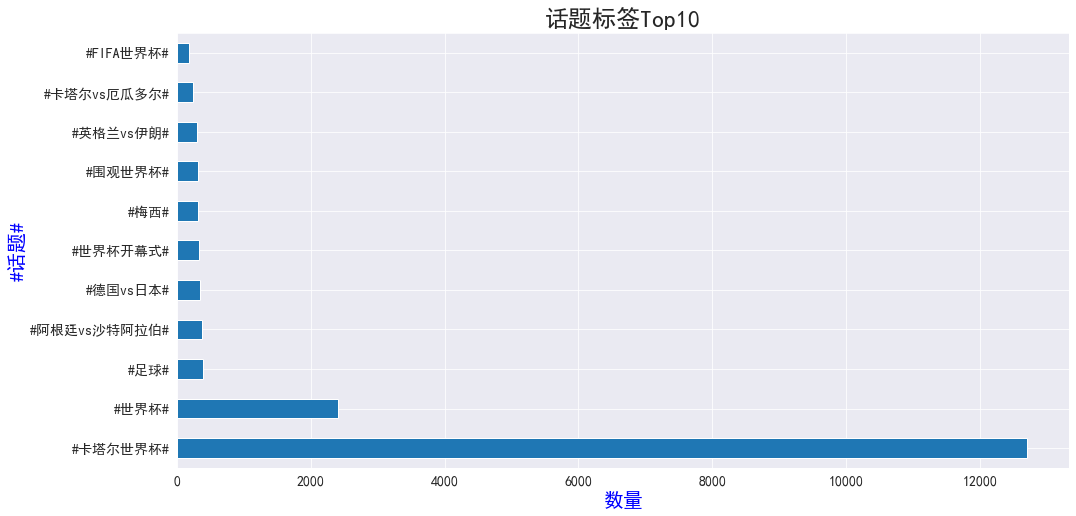

In [21]:
ht1_df.nlargest(11, 'Count').plot(kind = 'barh', 
            fontsize = 12,
            x = 'Hashtag',
            y = 'Count',
            figsize = (16,8),
            legend = None)

plt.title('ËØùÈ¢òÊ†áÁ≠æTop10', fontsize = 24)
plt.xlabel('Êï∞Èáè', fontsize = 20, color = 'blue')
plt.ylabel('#ËØùÈ¢ò#', fontsize = 20, color = 'blue')
plt.tick_params(axis='both', labelsize=14)

plt.rcParams['font.sans-serif'] = ['SimHei'] # Áî®Êù•Ê≠£Â∏∏ÊòæÁ§∫‰∏≠ÊñáÊ†áÁ≠æ
plt.rcParams['axes.unicode_minus'] = False # Áî®Êù•Ê≠£Â∏∏ÊòæÁ§∫Ë¥üÂè∑

plt.show()

## @ËâæÁâπÊï∞Á†îÁ©∂

In [22]:
# ÊâæÂá∫ÊâÄÊúâ @
mt1_list = []

for line in comment['ÂæÆÂçöÊ≠£Êñá']:
    line_s = line.split('\n')
    
    for i in range(0, len(line_s)):
        if i == 0:
            lst = re.findall(r'(@.+?):', line_s[i])
#             print(lst)

            if lst is not None:
                for each in lst:
                    mt1_list.append(each)

        if i == 1:
            lst = re.findall(r'ÂéüÂßãÁî®Êà∑: (.+)',line_s[i])
#             print(lst)

            if lst is not None:
                for each in lst:
                    mt1_list.append('@' + each)

        if i == 2:
            lst = re.findall(r'(@.+?) ', line_s[i])
#             print(lst)

            if lst is not None:
                for each in lst:
                    mt1_list.append(each)
                    
mt1_list

['@ËÖºËÖÜÁöÑËÖºËÖÜÁöÑ@ÁªøÊ¥≤Âä®ÊÄÅ',
 '@Êñ∞Êµ™‰ΩìËÇ≤#‰∏ñÁïåÊùØÂºÄÂπïÂºèÊèêÂâç‰∏ÄÂ∞èÊó∂##‰∏ñÁïåÊùØÂºÄÂπïÂºè#2022Âπ¥Âç°Â°îÂ∞î‰∏ñÁïåÊùØÂºÄÂπïÂºèÊèêÂâç‰∏ÄÂ∞èÊó∂ÔºåÂ∞Ü‰∫éÂåó‰∫¨Êó∂Èó¥‰ªäÊôö22',
 '@‰∫∫Ê∞ëÊó•Êä•„ÄêÊ≠£Âú®Áõ¥Êí≠Ôºö#‰∏ÄËµ∑Á≠âÂæÖ‰∏ñÁïåÊùØÂºÄÂπï#„ÄëÂç°Â°îÂ∞î‰∏ñÁïåÊùØÂºÄËµõÂú®Âç≥ÔºåÂåó‰∫¨Êó∂Èó¥21Êó•00',
 '@ÊûóÊ¢¶È∏ΩÂç°Â°îÂ∞î0',
 '@Ê¨ßÈôΩÈæçÊ£ÆÁöÑ@ÁªøÊ¥≤Âä®ÊÄÅ',
 '@Âú∞ÁêÉÈïúÂ§¥A',
 '@Á≤ò‰ªîÈ∫ªË¢ã',
 '@‰πî‰πîÂ¶πÂ¶π',
 '@FIFA‰∏ñÁïåÊùØËØ∑Êü•Êî∂#FIFA‰∏ñÁïåÊùØ#Á¨¨‰∫åÊØîËµõÊó•ÊàòÊä•üìßüè¥\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007fËã±Ê†ºÂÖ∞6',
 '@OnlyBayern',
 '@Áî®Êà∑7774662906ÁöÑË°®ÊÄÅ',
 '@‰∫∫Ê∞ëÊâßÊ≥ïÁõëÁù£Âëò',
 '@È™ëÊ°∂‰∫∫',
 '@È™ëÊ°∂‰∫∫',
 '@Ê¨ßÈôΩÈæçÊ£ÆÁöÑ@ÁªøÊ¥≤Âä®ÊÄÅ',
 '@Ê¨ßÈôΩÈæçÊ£ÆÁöÑ@ÁªøÊ¥≤Âä®ÊÄÅ',
 '@È¶ôËèúÊûúÂ≠êÁã∏bayernÊòØÂÆû‰π†Â•≥Â∑´',
 '@ÊñΩÈ≠èÂõ†ÊñØÊ≥∞Ê†ºÂêß',
 '@OnlyBayern',
 '@‰πî‰πîÂ¶πÂ¶π',
 '@ÈªÑÂÅ•Áøî',
 '@ÈªÑÂÅ•Áøî',
 '@ÂÖ±ÈùíÂõ¢Ë•øÂçóÂåªÁßëÂ§ßÂ≠¶ÂßîÂëò‰ºöÂæÆÂçö//@Ë•øÂçóÂåªÁßëÂ§ß‰∫∫Êñá‰∏éÁÆ°ÁêÜÂ≠¶Èô¢ÂàÜÂõ¢Âßî',
 '@Êô∫ÊÅíÂÖÖÁîµÊüú',
 '@ÈáëËææÂÆòÊñ

In [23]:
mt1_fre = {}

for user in mt1_list:
    mt1_fre[user] = mt1_fre.get(user, 0) +1
    
mt1_fre

{'@ËÖºËÖÜÁöÑËÖºËÖÜÁöÑ@ÁªøÊ¥≤Âä®ÊÄÅ': 1,
 '@Êñ∞Êµ™‰ΩìËÇ≤#‰∏ñÁïåÊùØÂºÄÂπïÂºèÊèêÂâç‰∏ÄÂ∞èÊó∂##‰∏ñÁïåÊùØÂºÄÂπïÂºè#2022Âπ¥Âç°Â°îÂ∞î‰∏ñÁïåÊùØÂºÄÂπïÂºèÊèêÂâç‰∏ÄÂ∞èÊó∂ÔºåÂ∞Ü‰∫éÂåó‰∫¨Êó∂Èó¥‰ªäÊôö22': 1,
 '@‰∫∫Ê∞ëÊó•Êä•„ÄêÊ≠£Âú®Áõ¥Êí≠Ôºö#‰∏ÄËµ∑Á≠âÂæÖ‰∏ñÁïåÊùØÂºÄÂπï#„ÄëÂç°Â°îÂ∞î‰∏ñÁïåÊùØÂºÄËµõÂú®Âç≥ÔºåÂåó‰∫¨Êó∂Èó¥21Êó•00': 1,
 '@ÊûóÊ¢¶È∏ΩÂç°Â°îÂ∞î0': 1,
 '@Ê¨ßÈôΩÈæçÊ£ÆÁöÑ@ÁªøÊ¥≤Âä®ÊÄÅ': 3,
 '@Âú∞ÁêÉÈïúÂ§¥A': 1,
 '@Á≤ò‰ªîÈ∫ªË¢ã': 1,
 '@‰πî‰πîÂ¶πÂ¶π': 2,
 '@FIFA‰∏ñÁïåÊùØËØ∑Êü•Êî∂#FIFA‰∏ñÁïåÊùØ#Á¨¨‰∫åÊØîËµõÊó•ÊàòÊä•üìßüè¥\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007fËã±Ê†ºÂÖ∞6': 1,
 '@OnlyBayern': 2,
 '@Áî®Êà∑7774662906ÁöÑË°®ÊÄÅ': 1,
 '@‰∫∫Ê∞ëÊâßÊ≥ïÁõëÁù£Âëò': 1,
 '@È™ëÊ°∂‰∫∫': 2,
 '@È¶ôËèúÊûúÂ≠êÁã∏bayernÊòØÂÆû‰π†Â•≥Â∑´': 1,
 '@ÊñΩÈ≠èÂõ†ÊñØÊ≥∞Ê†ºÂêß': 1,
 '@ÈªÑÂÅ•Áøî': 2,
 '@ÂÖ±ÈùíÂõ¢Ë•øÂçóÂåªÁßëÂ§ßÂ≠¶ÂßîÂëò‰ºöÂæÆÂçö//@Ë•øÂçóÂåªÁßëÂ§ß‰∫∫Êñá‰∏éÁÆ°ÁêÜÂ≠¶Èô¢ÂàÜÂõ¢Âßî': 5,
 '@Êô∫ÊÅíÂÖÖÁîµÊüú': 11,
 '@ÈáëËææÂÆòÊñπÂæÆÂçö': 3,
 '@Èõ™ËçûÂìÅÁâå': 9,
 '@ÂçéÂõæÊïôÂ∏àÂÆòÂæÆ//@ÂçéÂõæÊïôÂ∏àÂÆòÂæÆ'

In [24]:
average = len(mt1_list) / len(comment)

print('ÊâÄÊúâÂ∏ñÂ≠êÂÖ±‰ΩìËâæÁâπÊ¨°Êï∞ \t' + str(len(mt1_fre)))
print('Âπ≥ÂùáÊØè‰∏™Â∏ñÂ≠êÊèêÂà∞ \t' + str(average) + ' ‰∏™Áî®Êà∑')

ÊâÄÊúâÂ∏ñÂ≠êÂÖ±‰ΩìËâæÁâπÊ¨°Êï∞ 	26
Âπ≥ÂùáÊØè‰∏™Â∏ñÂ≠êÊèêÂà∞ 	0.004471289614057107 ‰∏™Áî®Êà∑


In [25]:
mt1_df = pd.DataFrame({'Áî®Êà∑': [user for user in mt1_fre.keys()],
                      'Count': [count for count in mt1_fre.values()]})

mt1_df = mt1_df.sort_values('Count', ascending=False).reset_index(drop=True)
mt1_df

Áî®Êà∑  Count
0                                              @Êô∫ÊÅíÂÖÖÁîµÊüú     11
1                                               @Èõ™ËçûÂìÅÁâå      9
2                   @ÂÖ±ÈùíÂõ¢Ë•øÂçóÂåªÁßëÂ§ßÂ≠¶ÂßîÂëò‰ºöÂæÆÂçö//@Ë•øÂçóÂåªÁßëÂ§ß‰∫∫Êñá‰∏éÁÆ°ÁêÜÂ≠¶Èô¢ÂàÜÂõ¢Âßî      5
3                                         @Ê¨ßÈôΩÈæçÊ£ÆÁöÑ@ÁªøÊ¥≤Âä®ÊÄÅ      3
4                                             @ÈáëËææÂÆòÊñπÂæÆÂçö      3
5                                                @ÈªÑÂÅ•Áøî      2
6                                           @Êó≠ËºùÈë´¬∑Â≥ªÂ∫∑ÂæÆËØ≠      2
7                                               @‰πî‰πîÂ¶πÂ¶π      2
8                                         @OnlyBayern      2
9                                                @È™ëÊ°∂‰∫∫      2
10                                       @ËÖºËÖÜÁöÑËÖºËÖÜÁöÑ@ÁªøÊ¥≤Âä®ÊÄÅ      1
11                                              @Êãú‰ªÅÂ∞èÁê¶      1
12                                         @Â∑¢Â∑¢Â∑¢Â∑¢Â∑¢Even      1
13                                              @ËãóËßÇ‰∫ëËµ∑      1
14                                   @ÂçéÂõæÊïôÂ∏àÂÆòÂæÆ//@ÂçéÂõæÊïôÂ∏àÂÆòÂæÆ      1
15                                  @È¶ôËèúÊûúÂ≠êÁã∏bayernÊòØÂÆû‰π†Â•≥Â∑´      1
16                                           @ÊñΩÈ≠èÂõ†ÊñØÊ≥∞Ê†ºÂêß      1
17  @Êñ∞Êµ™‰ΩìËÇ≤#‰∏ñÁïåÊùØÂºÄÂπïÂºèÊèêÂâç‰∏ÄÂ∞èÊó∂##‰∏ñÁïåÊùØÂºÄÂπïÂºè#2022Âπ¥Âç°Â°îÂ∞î‰∏ñÁïåÊùØÂºÄÂπïÂºèÊèêÂâç‰∏ÄÂ∞èÊó∂Ôºå...      1
18                                           @‰∫∫Ê∞ëÊâßÊ≥ïÁõëÁù£Âëò      1
19                                   @Áî®Êà∑7774662906ÁöÑË°®ÊÄÅ      1
20            @FIFA‰∏ñÁïåÊùØËØ∑Êü•Êî∂#FIFA‰∏ñÁïåÊùØ#Á¨¨‰∫åÊØîËµõÊó•ÊàòÊä•üìßüè¥Û†ÅßÛ†Å¢Û†Å•Û†ÅÆÛ†ÅßÛ†ÅøËã±Ê†ºÂÖ∞6      1
21                                              @Á≤ò‰ªîÈ∫ªË¢ã      1
22                                             @Âú∞ÁêÉÈïúÂ§¥A      1
23                                           @ÊûóÊ¢¶È∏ΩÂç°Â°îÂ∞î0      1
24        @‰∫∫Ê∞ëÊó•Êä•„ÄêÊ≠£Âú®Áõ¥Êí≠Ôºö#‰∏ÄËµ∑Á≠âÂæÖ‰∏ñÁïåÊùØÂºÄÂπï#„ÄëÂç°Â°îÂ∞î‰∏ñÁïåÊùØÂºÄËµõÂú®Âç≥ÔºåÂåó‰∫¨Êó∂Èó¥21Êó•00      1
25                                       @ÂçóÊòåÊ†°Âõ≠@ÂæÆÂçöÊ†°Âõ≠Âá∫ÂìÅ      1

## ËâæÁâπÊï∞Top5

In [26]:
mt1_df.nlargest(5, 'Count')

Áî®Êà∑  Count
0                             @Êô∫ÊÅíÂÖÖÁîµÊüú     11
1                              @Èõ™ËçûÂìÅÁâå      9
2  @ÂÖ±ÈùíÂõ¢Ë•øÂçóÂåªÁßëÂ§ßÂ≠¶ÂßîÂëò‰ºöÂæÆÂçö//@Ë•øÂçóÂåªÁßëÂ§ß‰∫∫Êñá‰∏éÁÆ°ÁêÜÂ≠¶Èô¢ÂàÜÂõ¢Âßî      5
3                        @Ê¨ßÈôΩÈæçÊ£ÆÁöÑ@ÁªøÊ¥≤Âä®ÊÄÅ      3
4                            @ÈáëËææÂÆòÊñπÂæÆÂçö      3

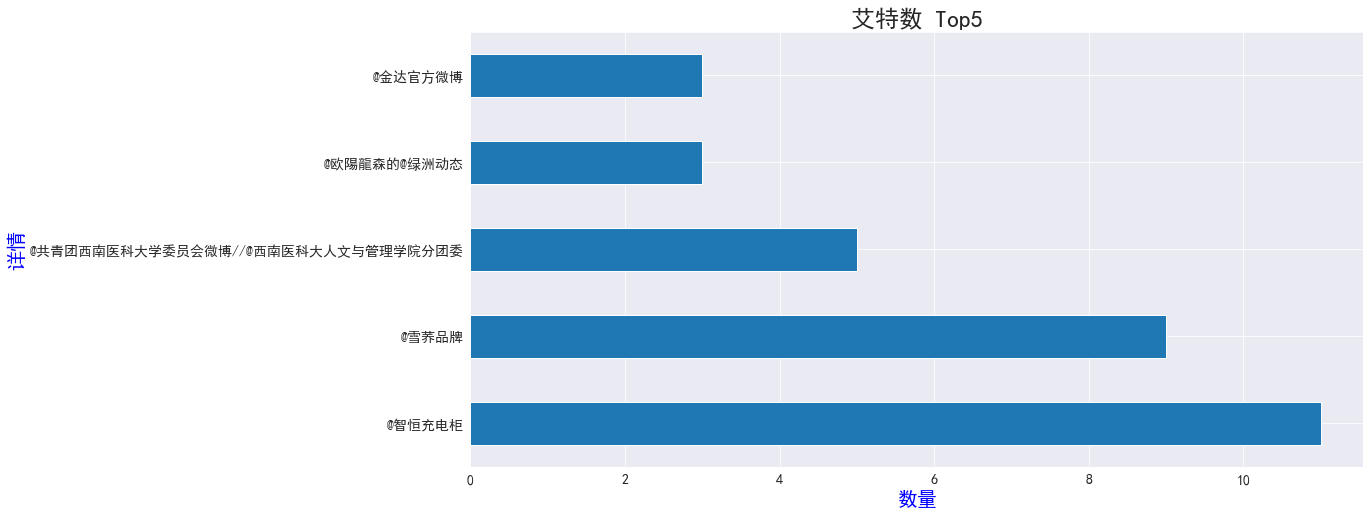

In [27]:
mt1_df.nlargest(5, 'Count').plot(kind = 'barh', 
            fontsize = 12,
            x = 'Áî®Êà∑',
            y = 'Count',
            figsize = (16,8),
            legend = None)

plt.title('ËâæÁâπÊï∞ Top5', fontsize = 24)
plt.xlabel('Êï∞Èáè', fontsize = 20, color = 'blue')
plt.ylabel('ËØ¶ÊÉÖ', fontsize = 20, color = 'blue')
plt.tick_params(axis='both', labelsize=14)

plt.rcParams['font.sans-serif'] = ['SimHei'] # Áî®Êù•Ê≠£Â∏∏ÊòæÁ§∫‰∏≠ÊñáÊ†áÁ≠æ
plt.rcParams['axes.unicode_minus'] = False # Áî®Êù•Ê≠£Â∏∏ÊòæÁ§∫Ë¥üÂè∑

plt.show()

# Áî®Êà∑Á†îÁ©∂ ËΩ¨Âèë„ÄÅÁÇπËµûÂíåËØÑËÆ∫

## Áî®Êà∑ÂõûÂ§çÊï∞Êó∂Èó¥Á∫ø

In [14]:
combine1_df = pd.DataFrame({'Date': date_list1_clean,
                    'Content': comment['ÂæÆÂçöÊ≠£Êñá'],
                   'Repost': comment['ËΩ¨ÂèëÊï∞'],
                   'Like': comment['ÁÇπËµûÊï∞'],
                   'Comment': comment['ËØÑËÆ∫Êï∞']
                           })
combine1_df

Date                                            Content  \
id                                                                             
4.840000e+15  11/20 00:23  ‰∏ñÁïåÊùØÁõòÁÇπÈÇ£‰∫õÂ•ΩÂê¨ÁöÑ‰∏ñÁïåÊùØ‰∏ªÈ¢òÊõ≤ü§ó~2022Âπ¥Âç°Â°îÂ∞î‰∏ñÁïåÊùØ„ÄäHayyaHayya„Äãüî•üî•üî•#Âç°...   
4.840000e+15  11/20 00:23  ÊΩòÂ∏ïÊñØÈõÑÈπ∞ÂøÖÂ∞ÜÁø±ÁøîÂú®Âç°Â°îÂ∞î‰∏äÁ©∫üá¶üá∑‚öΩÔ∏èÂ∞±ÊÉ≥Ê¢ÖË•øÂ§∫ÂÜ†ÔºåÂ∞±ÊÉ≥‰ªñÂ∞ÅÁ•ûÔºåÂ∞±ÊÉ≥‰ªñÊçßËµ∑Â§ßÂäõÁ•ûÊùØÂ¶ÇÊÑøÂêßÔºåÂ¶Ç...   
4.840000e+15  11/20 00:25                               #Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#ÂõõÂπ¥Âêé‰∏úÂ±±ÂÜçËµ∑Âä†Ê≤πÈòøÊ†πÂª∑   
4.840000e+15  11/20 00:27  ‰∏ñÁïåÊùØËøô‰∏™‰∏ªÈ¢òÊõ≤ÁúüÁöÑ‰∏ÄË®ÄÈöæÂ∞ΩÁ¨¨‰∏ÄÈÅçÔºö‰ªÄ‰πàÁé©ÊÑèËøôÊòØÁ¨¨‰∫åÈÅçÔºöÂ•ΩÂÉèËøòË°åÁ¨¨‰∏âÈÅçÔºöÊØíËèáÊØíËèáÊØíÂìíÂìí#Âç°Â°î...   
4.840000e+15  11/20 00:27                                ‰ªäÂπ¥ÊàëËßâÂæóÂ∑¥Ë•øÂèØËÉΩ‰ºöËµ¢#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#   
...                   ...                                                ...   
4.840000e+15  11/24 23:34          ÊàëËÆ∞Âæó‰Ω†ÂØπÊàëËØ¥Ëøá‰∏çÊ≠¢Ê¢ÖË•øÂ∏ÖÔºåÂÜÖÈ©¨Â∞î‰πüË∂ÖÂ∏Ö#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#LÂèØ‰πêÊ©òÂ≠êÊ∞îÊ≥°Ê∞¥ÁöÑÂæÆÂçöËßÜÈ¢ë   
4.840000e+15  11/24 23:34  #Âç°Â°îÂ∞î‰∏ñÁïåÊùØ##‰πåÊãâÂú≠0ÊØî0Èü©ÂõΩ#ÂèåÊñπÂäøÂùáÂäõÊïåÔºåüá∞üá∑ÁîöËá≥ËÉΩÊää82Ë∏¢Á∫¢Ê∏©‰∫ÜÂ∞±ÊòØËøô‰ø©ÈòüÁöÑÂèçÂáªÁúã...   
4.840000e+15  11/24 23:35                 ‰ªäÂ§©ÂáåÊô®Èõ∂ÁÇπÁúãCÁΩóÔºå3ÁÇπÁúãÂÜÖÈ©¨Â∞î‚öΩ#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ##CÁΩó##ÂÜÖÈ©¨Â∞î#   
4.840000e+15  11/24 23:35  ÊòéÂáåÊô®0ÁÇπÂç°Â°îÂ∞î‰∏ñÁïåÊùØÂ∞èÁªÑËµõHÁªÑÁ¨¨1ËΩÆËë°ËêÑÁâôüáµüáπVSüá¨üá≠Âä†Á∫≥‰ªéÂÄíÊï∞ÁôæÂ§©Âà∞‰ªäÂ§©ÁöÑËøô‰∏ÄÂàªÂç≥Â∞ÜÊù•‰∏¥...   
4.840000e+15  11/24 23:35  11.24ÂèàËèúÂèàÁà±ÁúãÂèàÁà±Áé©Â∞±ÊòØÊàë#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#Âí±Â∞±‰º∞Êë∏ÁùÄÔΩû‰∏§Âì•‰πüÂú®ÁúãÊú±‰∏ÄÈæô#Êú±‰∏ÄÈæô#ËÉ°Ê≠å#ËÉ°Ê≠å#   

              Repost  Like  Comment  
id                                   
4.840000e+15       1     5        0  
4.840000e+15       0     1        3  
4.840000e+15       0     1        2  
4.840000e+15       0     0        1  
4.840000e+15       0     1        1  
...              ...   ...      ...  
4.840000e+15       0     0        0  
4.840000e+15       0     0        0  
4.840000e+15       0     0        0  
4.840000e+15       0     0        0  
4.840000e+15       0     0        0  

[12748 rows x 5 columns]

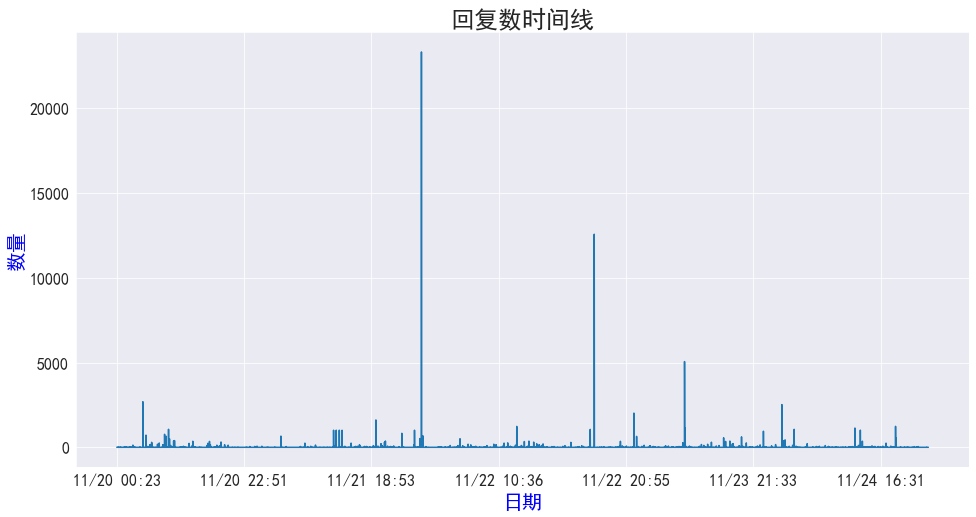

In [29]:
combine1_df[::].plot(kind = 'line', 
                  x = 'Date',
                  y = 'Repost', # ÈúÄË¶Å‰øÆÊîπ
                  fontsize = 12,
                 figsize = (16,8),
                 legend = None)
plt.title('ÂõûÂ§çÊï∞Êó∂Èó¥Á∫ø', fontsize = 24)
plt.xlabel('Êó•Êúü', fontsize = 20, color = 'blue')
plt.ylabel('Êï∞Èáè', fontsize = 20, color = 'blue')
plt.tick_params(axis='both', labelsize=16)
plt.grid(True)
plt.show()

## ËØÑËÆ∫Êï∞Êó∂Èó¥Á∫ø

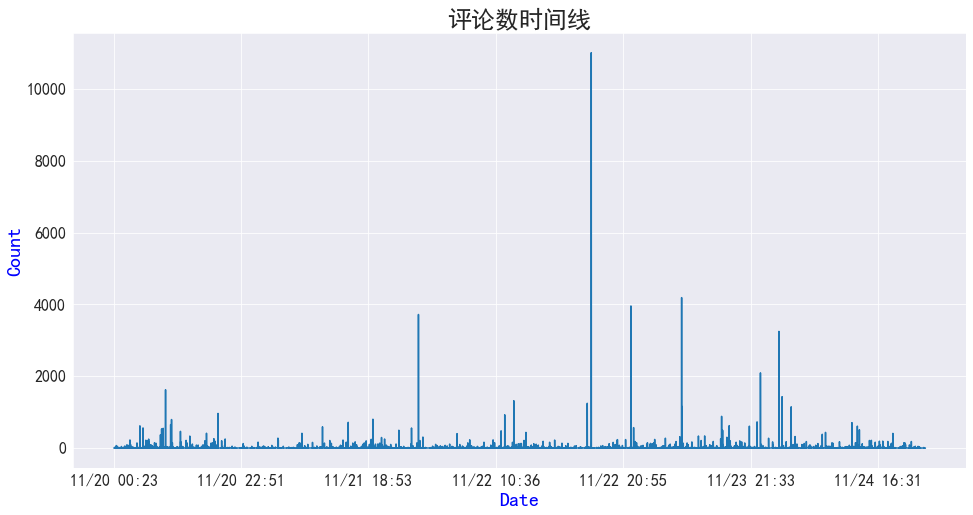

In [30]:
combine1_df[::].plot(kind = 'line', 
                  x = 'Date',
                  y = 'Comment',
                  fontsize = 12,
                 figsize = (16,8),
                 legend = None)
plt.title('ËØÑËÆ∫Êï∞Êó∂Èó¥Á∫ø', fontsize = 24)
plt.xlabel('Date', fontsize = 20, color = 'blue')
plt.ylabel('Count', fontsize = 20, color = 'blue')
plt.tick_params(axis='both', labelsize=16)
plt.grid(True)
plt.show()

## ÂºïÂèëÁÉ≠Èó®ËØÑËÆ∫Â∏ñÂ≠ê Top5

In [31]:
number = 0

print('The top 5 most Comment posts are:')

while number != 5:
    print('\nNo.' + str(number+1) + '.')
    print('Date: ' + combine1_df.sort_values('Comment', ascending=False).reset_index(drop=True)['Date'][number])
    print('Comment Count: ' + str(combine1_df.sort_values('Comment', ascending=False).reset_index(drop=True)['Comment']
                                  [number]))
    print('Content: \n' + combine1_df.sort_values('Comment', ascending=False).reset_index(drop=True)['Content'][number])
    number += 1

The top 5 most Comment posts are:

No.1.
Date: 11/22 20:07
Comment Count: 11009
Content: 
„Äê#Ê≤ôÁâπËµ¢‰∫Ü#„ÄëÂàöÂàöÔºåÂç°Â°îÂ∞î‰∏ñÁïåÊùØÔºåÊ≤ôÁâπÈòøÊãâ‰ºØ2ÊØî1ÂáªË¥•ÈòøÊ†πÂª∑ÔºÅ#ÈòøÊ†πÂª∑ÁàÜÂÜ∑##Ê≤ôÁâπÂÆàÈó®Âëò#

No.2.
Date: 11/23 08:07
Comment Count: 4189
Content: 
‰∏ñÁïåÊùØÂ∞èÁéãÂ≠êË°®ÊÉÖÂåÖÔΩû

No.3.
Date: 11/23 07:10
Comment Count: 4155
Content: 
„Äê#‰∏ñÁïåÊùØÈöèÂ§ÑÂèØËßÅ‰∏≠ÂõΩÂÖÉÁ¥†#„ÄëÊè≠ÂπïÊàòÂÖ•Âú∫‰ª™Âºè‰∏äÁöÑ‰∏≠ÂõΩÊä§ÊóóÊâã„ÄÅ‰πò‰∏ìÊú∫ÊäµËææÂç°Â°îÂ∞îÁöÑÂ§ßÁÜäÁå´‚Äú‰∫¨‰∫¨‚Äù‚ÄúÂõõÊµ∑‚Äù„ÄÅ‰∏≠ÂõΩ‰ºÅ‰∏öÊâøÂª∫ÁöÑÂç°Â°îÂ∞î‰∏ñÁïåÊùØ‰∏ª‰ΩìËÇ≤Âú∫„ÄÅÁÉ≠ÈîÄÁöÑ‰∏ñÁïåÊùØÁ∫™ÂøµÂìÅÔºå#2022Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#ËµõÂú∫ÂÜÖÂ§ñÔºåÊúâÂ§™Â§ö‰∏é‰∏≠ÂõΩÁõ∏ÂÖ≥ÁöÑÂÖÉÁ¥†„ÄÇÁúã‚Üì‚Üì

No.4.
Date: 11/22 21:37
Comment Count: 3956
Content: 
ÁêÜÈ°∫‰∫Ü‰∏Ä‰∏™ÂÖ≥Á≥ªÔºöÈú∏ÊÄªÊòØÈ•∫Â≠êÁöÆÁöÑÂì•Âì•Èú∏ÊÄªÂ∑≤Â©öÔºå1‰∏™ËÄÅÂ©Ü8‰∏™Â≠©Â≠êÈ•∫Â≠êÁöÆÔºå‰ªäÂπ¥Êâç15Â≤Å#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#

No.5.
Date: 11/21 22:33
Comment Count: 3719
Content: 
#Ëã±Ê†ºÂÖ∞vs‰ºäÊúó#Â£ÆËßÇÔºÅÁúãÂè∞‰∏äÁöÑ‰ºóÂ§ö‰ºäÊúóÁêÉËø∑ÈõÜ‰Ωì‰∏∫‰ºäÊúóÂ•≥ÊÄßÂèëÂ£∞

## ÂºïÂèëÁÉ≠Èó®ÂõûÂ§çÂ∏ñÂ≠ê Top5

In [33]:
number = 0
print('The top 5 most REPOST posts are:')
while number != 5:
    print('\nNo.' + str(number+1) + '.')
    print('Êó•Êúü: \t\t' + combine1_df.sort_values('Repost', ascending=False).reset_index(drop=True)['Date'][number])
    print('ÂõûÂ§çÊï∞: \t' + str(combine1_df.sort_values('Repost', ascending=False).reset_index(drop=True)['Repost'][number]))
    print('ÂÜÖÂÆπ: \t\t' + combine1_df.sort_values('Repost', ascending=False).reset_index(drop=True)['Content'][number])
    number += 1

The top 5 most REPOST posts are:

No.1.
Êó•Êúü: 		11/21 22:33
ÂõûÂ§çÊï∞: 	23327
ÂÜÖÂÆπ: 		#Ëã±Ê†ºÂÖ∞vs‰ºäÊúó#Â£ÆËßÇÔºÅÁúãÂè∞‰∏äÁöÑ‰ºóÂ§ö‰ºäÊúóÁêÉËø∑ÈõÜ‰Ωì‰∏∫‰ºäÊúóÂ•≥ÊÄßÂèëÂ£∞ÔºÅ#‰∏ñÁïåÊùØ##Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#

No.2.
Êó•Êúü: 		11/22 20:07
ÂõûÂ§çÊï∞: 	12572
ÂÜÖÂÆπ: 		„Äê#Ê≤ôÁâπËµ¢‰∫Ü#„ÄëÂàöÂàöÔºåÂç°Â°îÂ∞î‰∏ñÁïåÊùØÔºåÊ≤ôÁâπÈòøÊãâ‰ºØ2ÊØî1ÂáªË¥•ÈòøÊ†πÂª∑ÔºÅ#ÈòøÊ†πÂª∑ÁàÜÂÜ∑##Ê≤ôÁâπÂÆàÈó®Âëò#

No.3.
Êó•Êúü: 		11/23 07:10
ÂõûÂ§çÊï∞: 	5058
ÂÜÖÂÆπ: 		„Äê#‰∏ñÁïåÊùØÈöèÂ§ÑÂèØËßÅ‰∏≠ÂõΩÂÖÉÁ¥†#„ÄëÊè≠ÂπïÊàòÂÖ•Âú∫‰ª™Âºè‰∏äÁöÑ‰∏≠ÂõΩÊä§ÊóóÊâã„ÄÅ‰πò‰∏ìÊú∫ÊäµËææÂç°Â°îÂ∞îÁöÑÂ§ßÁÜäÁå´‚Äú‰∫¨‰∫¨‚Äù‚ÄúÂõõÊµ∑‚Äù„ÄÅ‰∏≠ÂõΩ‰ºÅ‰∏öÊâøÂª∫ÁöÑÂç°Â°îÂ∞î‰∏ñÁïåÊùØ‰∏ª‰ΩìËÇ≤Âú∫„ÄÅÁÉ≠ÈîÄÁöÑ‰∏ñÁïåÊùØÁ∫™ÂøµÂìÅÔºå#2022Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#ËµõÂú∫ÂÜÖÂ§ñÔºåÊúâÂ§™Â§ö‰∏é‰∏≠ÂõΩÁõ∏ÂÖ≥ÁöÑÂÖÉÁ¥†„ÄÇÁúã‚Üì‚Üì

No.4.
Êó•Êúü: 		11/23 08:07
ÂõûÂ§çÊï∞: 	4047
ÂÜÖÂÆπ: 		‰∏ñÁïåÊùØÂ∞èÁéãÂ≠êË°®ÊÉÖÂåÖÔΩû

No.5.
Êó•Êúü: 		11/20 14:37
ÂõûÂ§çÊï∞: 	2689
ÂÜÖÂÆπ: 		„ÄêÂÖ≥Ê≥®+ËΩ¨ÂèëÔºå11.30ÊäΩ10‰∫∫Âπ≥ÂàÜ500ÂÖÉJDÂç°„Äë2022#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#ÁãÇÁÉ≠Êù•Ë¢≠ÔºÅÊø

In [15]:
combine1_df.sort_values('Comment', ascending=False)['Content']

id
4.840000e+15       „Äê#Ê≤ôÁâπËµ¢‰∫Ü#„ÄëÂàöÂàöÔºåÂç°Â°îÂ∞î‰∏ñÁïåÊùØÔºåÊ≤ôÁâπÈòøÊãâ‰ºØ2ÊØî1ÂáªË¥•ÈòøÊ†πÂª∑ÔºÅ#ÈòøÊ†πÂª∑ÁàÜÂÜ∑##Ê≤ôÁâπÂÆàÈó®Âëò#
4.838880e+15                                           ‰∏ñÁïåÊùØÂ∞èÁéãÂ≠êË°®ÊÉÖÂåÖÔΩû
4.838860e+15    „Äê#‰∏ñÁïåÊùØÈöèÂ§ÑÂèØËßÅ‰∏≠ÂõΩÂÖÉÁ¥†#„ÄëÊè≠ÂπïÊàòÂÖ•Âú∫‰ª™Âºè‰∏äÁöÑ‰∏≠ÂõΩÊä§ÊóóÊâã„ÄÅ‰πò‰∏ìÊú∫ÊäµËææÂç°Â°îÂ∞îÁöÑÂ§ßÁÜäÁå´‚Äú‰∫¨‰∫¨‚Äù...
4.840000e+15     ÁêÜÈ°∫‰∫Ü‰∏Ä‰∏™ÂÖ≥Á≥ªÔºöÈú∏ÊÄªÊòØÈ•∫Â≠êÁöÆÁöÑÂì•Âì•Èú∏ÊÄªÂ∑≤Â©öÔºå1‰∏™ËÄÅÂ©Ü8‰∏™Â≠©Â≠êÈ•∫Â≠êÁöÆÔºå‰ªäÂπ¥Êâç15Â≤Å#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#
4.840000e+15        #Ëã±Ê†ºÂÖ∞vs‰ºäÊúó#Â£ÆËßÇÔºÅÁúãÂè∞‰∏äÁöÑ‰ºóÂ§ö‰ºäÊúóÁêÉËø∑ÈõÜ‰Ωì‰∏∫‰ºäÊúóÂ•≥ÊÄßÂèëÂ£∞ÔºÅ#‰∏ñÁïåÊùØ##Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#
                                      ...                        
4.840000e+15    ÂæÆÂçöÂ∞èÈõ™Êò†‰∏áÁâ©ÔºåÂ§©Âú∞‰ªäÂßãÁôΩ„ÄÇ‰ªäÊó•Â∞èÈõ™ÔºåÂÜ¨Êó•ÂØíÈ£éÁëüÁëüÔºåË¶ÅÊ≥®ÊÑèË∞ÉÊï¥ÂøÉÊÄÅÔºå‰øùÊåÅÂ•ΩÂøÉÊÉÖÂëÄÔºÅÊÑø‰Ω†ÂØíÂÜ¨Êúâ...
4.840000e+15    ‰∏≠ÂõΩ#Âç°Â°îÂ∞î‰∏ñÁïåÊùØ#ÂΩìÂú∞Êó∂Èó¥21Êó•Ôºå2022‰∏ñÁïåÊùØÂ∞èÁªÑËµõBÁªÑÈ¶ñËΩÆÔºåËã±Ê

## ÂõûÂ§çÊó∂Èó¥Á∫ø

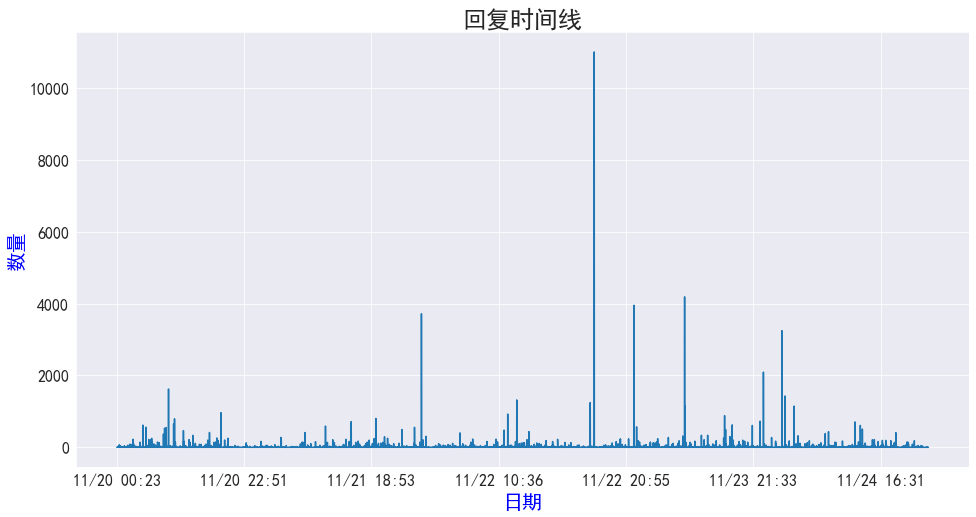

In [35]:
combine1_df[::].plot(kind = 'line', 
                  x = 'Date',
                  y = 'Comment',
                  fontsize = 12,
                 figsize = (16,8),
                 legend = None)
plt.title('ÂõûÂ§çÊó∂Èó¥Á∫ø', fontsize = 24)
plt.xlabel('Êó•Êúü', fontsize = 20, color = 'blue')
plt.ylabel('Êï∞Èáè', fontsize = 20, color = 'blue')
plt.tick_params(axis='both', labelsize=16)
plt.grid(True)
plt.show()

## ËØÑËÆ∫Âå∫Êï∞ÊçÆÁÇπËµûÊï∞ÊéíÂ∫è

In [36]:
mean_ratings = comment.pivot_table(index='id',values=['ËΩ¨ÂèëÊï∞','ËØÑËÆ∫Êï∞','ÁÇπËµûÊï∞']).sort_values(by='ÁÇπËµûÊï∞', ascending=False)
mean_ratings.head(10)

ÁÇπËµûÊï∞          ËØÑËÆ∫Êï∞          ËΩ¨ÂèëÊï∞
id                                                  
4.838880e+15  46842.000000  4189.000000  4047.000000
4.838960e+15   2071.000000   191.000000   196.000000
4.838890e+15    980.000000   981.000000  1535.000000
4.838860e+15    793.870968   145.419355   172.774194
4.838910e+15    369.000000  1160.000000  1162.000000
4.839100e+15    342.918089    30.924915    19.897611
4.838840e+15    186.648649     2.702703     3.054054
4.838920e+15    156.000000    83.500000    86.500000
4.838790e+15    128.250000     9.093750     3.343750
4.839000e+15    111.911765    10.823529     5.000000

## ËØÑËÆ∫ÂÜÖÂÆπÂ≠óÁ¨¶Êï∞Â§ßÂ∞è

In [37]:
a = b = c = d = 0

for i in comment['ÂæÆÂçöÊ≠£Êñá']:
    n = len(i)
    if 0 < n < 20:
        a+=1
    elif 20 <= n < 50:
        b+=1
    elif 50 <= n < 100:
        c+=1
    else :
        d+=1

print("ËØÑËÆ∫ÂÜÖÂÆπÂ≠óÁ¨¶Êï∞Â§ßÂ∞èÁªüËÆ°Ôºö")
print("Â≠óÁ¨¶Êï∞Â∞è‰∫é20ÁöÑÊúâÔºö{}‰∏™ \t Âç†ÊØî:{:.2f}".format(a,a/len(comment)))
print("Â≠óÁ¨¶Êï∞20<=n<50ÁöÑÊúâÔºö{}‰∏™ \t Âç†ÊØî:{:.2f}".format(b,b/len(comment)))
print("Â≠óÁ¨¶Êï∞50<=n<100ÁöÑÊúâÔºö{}‰∏™ \t Âç†ÊØî:{:.2f}".format(c,c/len(comment)))
print("Â≠óÁ¨¶Êï∞Â§ß‰∫é100ÁöÑÊúâÔºö{}‰∏™ \t Âç†ÊØî:{:.2f}".format(d,d/len(comment)))

ËØÑËÆ∫ÂÜÖÂÆπÂ≠óÁ¨¶Êï∞Â§ßÂ∞èÁªüËÆ°Ôºö
Â≠óÁ¨¶Êï∞Â∞è‰∫é20ÁöÑÊúâÔºö1649‰∏™ 	 Âç†ÊØî:0.13
Â≠óÁ¨¶Êï∞20<=n<50ÁöÑÊúâÔºö5126‰∏™ 	 Âç†ÊØî:0.40
Â≠óÁ¨¶Êï∞50<=n<100ÁöÑÊúâÔºö3554‰∏™ 	 Âç†ÊØî:0.28
Â≠óÁ¨¶Êï∞Â§ß‰∫é100ÁöÑÊúâÔºö2419‰∏™ 	 Âç†ÊØî:0.19


## ÁªºÂêàÂõûÂ§çÊï∞ÔºåÁÇπËµûÊï∞ÔºåËØÑËÆ∫Êï∞‰∏âÈ°π

In [16]:
repost1 = pd.Series(data = combine1_df[::-1]['Repost'].values, index = combine1_df[::-1]['Date'])
like1 = pd.Series(data = combine1_df[::-1]['Like'].values, index = combine1_df[::-1]['Date'])
comment1 = pd.Series(data = combine1_df[::-1]['Comment'].values, index = combine1_df[::-1]['Date'])

repost1

Date
11/24 23:35    0
11/24 23:35    0
11/24 23:35    0
11/24 23:34    0
11/24 23:34    0
              ..
11/20 00:27    0
11/20 00:27    0
11/20 00:25    0
11/20 00:23    0
11/20 00:23    1
Length: 12748, dtype: int64

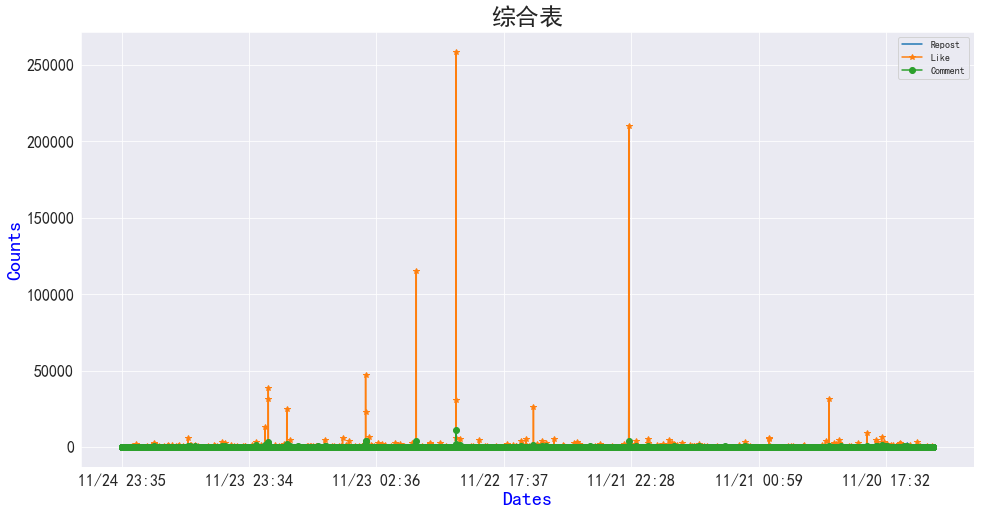

In [39]:
repost1.plot(figsize = (16,8), label = "Repost", legend = True) # Provide different marker for each plot.
like1.plot(figsize = (16,8), label = "Like", legend = True, marker = '*')
comment1.plot(figsize = (16,8), label = "Comment", legend = True, marker = 'o')

plt.title('ÁªºÂêàË°®', fontsize = 24)
plt.xlabel('Dates', fontsize = 20, color = 'blue')
plt.ylabel('Counts', fontsize = 20, color = 'blue')
plt.tick_params(axis='both', labelsize=16)
plt.show()

# Êï∞ÊçÆÂàÜÊûêÂèäÂèØËßÜÂåñ

### ËØÑËÆ∫Âå∫ÁÉ≠Âõæ

In [17]:
yuntu_data = pd.DataFrame({'user_id':comment['user_id'],'ÁÇπËµûÊï∞':comment['ÁÇπËµûÊï∞'],'ËØÑËÆ∫Êï∞':comment['ËØÑËÆ∫Êï∞'],'ËΩ¨ÂèëÊï∞':comment['ËΩ¨ÂèëÊï∞']})
yuntu_data

user_id  ÁÇπËµûÊï∞  ËØÑËÆ∫Êï∞  ËΩ¨ÂèëÊï∞
id                                     
4.840000e+15  6934544753    5    0    1
4.840000e+15  2619726591    1    3    0
4.840000e+15  2844948403    1    2    0
4.840000e+15  6081458415    0    1    0
4.840000e+15  3835409455    1    1    0
...                  ...  ...  ...  ...
4.840000e+15  3882759549    0    0    0
4.840000e+15  6267821803    0    0    0
4.840000e+15  3839059935    0    0    0
4.840000e+15  1712344213    0    0    0
4.840000e+15  1925882322    0    0    0

[12748 rows x 4 columns]

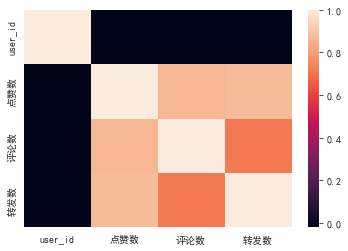

In [41]:
correlations = yuntu_data.corr()
sns.heatmap(correlations)
plt.show()

### ËØÑËÆ∫ÂÖ≥ÈîÆÂ≠óÈ¢ëÁéá‰∫ëÂõæ

In [59]:
comment_fname = r"D:\zhuomian\WeiBoTopic\Environment/data.csv"
comment = pd.read_csv(comment_fname,sep=',',engine='python')
word_list = jieba.cut(str(comment['ÂæÆÂçöÊ≠£Êñá']))
result = " ".join(word_list) # ÂàÜËØçÁî® ÈöîÂºÄ
# Âà∂‰Ωú‰∏≠Êñá‰∫ëËØç
gen_stylecloud(text=result,
           font_path='C:\\Windows\\Fonts\\simhei.ttf',
           output_name='D:\zhuomian\WeiBoTopic\Result\comment_yuntu.png',
           icon_name='fas fa-bell'
           ) # ÂøÖÈ°ªÂä†‰∏≠ÊñáÂ≠ó‰ΩìÔºåÂê¶ÂàôÊ†ºÂºèÈîôËØØ